# ML講座の課題
* 3月14日
* 3月15日現在での自身の内部課題の調査／解決法の追加


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, sys

## 1.データの読み込みと確認

### 1.1 データ読み込みと実行確認（最初5行を読み出し確認）

In [63]:
df_2018= pd.read_csv("../DATA/kickst/ks-projects-201801.csv")

In [64]:
display(df_2018.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [35]:
df_2016 = pd.read_csv("../DATA/kickst/ks-projects-201612.csv", encoding="ISO-8859-1", low_memory=False)

In [36]:
display(df_2016.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


### 1.2 登録データの各項目、欠損などの確認

In [39]:
display(df_2018.describe())

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [55]:
#print(df_2018.columns)
print(df_2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


### 注意
時間データ「deadline/launcnedの日時が、Object型のため」、変更が必要

## データセット内の項目選定
＜利用しない項目と、その理由など＞<BR>
１）通貨：currency => GBP,USD,EUR,AUDなど各国の通貨単位があった。<BR>
    しかし、下記の様に、USD換金した項目が存在するために、他項目と合わせ「使用しない」。

２）入金金額：pledged =＞各国の通貨単位での入金済み金額<BR>
　　USDへ変換した入金金額の項目「usd_pledged」を利用する
   
３）目標金額：goal => =＞各国の通貨単位でのクラウドファウンディングの目標金額<BR>
　　USDへ変換した目標金額の項目「usd_goal_real」を利用する

In [56]:
print(df_2016.columns)
print(df_2016.info())

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
ID                323750 non-null int64
name              323746 non-null object
category          323745 non-null object
main_category     323750 non-null object
currency          323750 non-null object
deadline          323750 non-null object
goal              323750 non-null object
launched          323750 non-null object
pledged           323750 non-null object
state             323750 non-null object
backers           323750 non-null object
country           323750 non-null object
usd pledged       319960 non-null object
Unnamed: 13       625 non-null object
Unnamed: 14       12 non-null object
Unnamed: 15   

In [21]:
display(ORG_Data2.tail())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25,NaN,NaN,NaN,NaN
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155,NaN,NaN,NaN,NaN
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20,NaN,NaN,NaN,NaN
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200,NaN,NaN,NaN,NaN
323749,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16 09:07:47,2000,2011-07-19 09:07:47,524,failed,17,US,524,NaN,NaN,NaN,NaN


### データセットの取捨選択
2点の登録データ（2016・2018.CSV）は、ほぼ同じ内容で、追加があると思われ、2018.csv側を使用する。

【選択理由】
１）2016には、登録データにおいて、「2018のデータに含まれるている」
２）項目「usd_pledged」以降の項目、4点「Unnamed13/14/15/16」においては値が設定されていたなく、NaNが多数存在するため

In [31]:
display(ORG_Dt1.iloc[323745:])

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
323745,718925091,Better RPG Tools (PFRPG d20),Tabletop Games,Games,USD,2012-04-07,1000.0,2012-03-24 02:41:36,1031.50,successful,94,US,1031.50,1031.50,1000.00
323746,718925964,Abduction from the Seraglio- Mozart goes Burle...,Theater,Theater,USD,2011-02-25,5500.0,2011-01-26 19:37:24,212.00,failed,12,US,212.00,212.00,5500.00
323747,71893729,Dreams of Telluride - A Plein Air Painting Cha...,Painting,Art,USD,2015-09-15,4930.0,2015-08-16 15:17:32,3920.00,failed,11,US,3920.00,3920.00,4930.00
323748,718939836,"PocoWool: Your Grab-n-Go iPhone Case ""attachable""",Product Design,Design,USD,2013-01-05,2000.0,2012-12-06 23:48:41,2679.00,successful,43,US,2679.00,2679.00,2000.00
323749,718940258,SNATCHED (Canceled),Fiction,Publishing,GBP,2015-05-13,5000.0,2015-04-13 16:40:14,0.00,canceled,0,GB,0.00,0.00,7854.72
323750,718965728,The Grave of Saint Oran: A Neil Gaiman Animation,Animation,Film & Video,USD,2016-05-05,45000.0,2016-04-05 21:03:29,70053.38,successful,1812,US,70053.38,70053.38,45000.00
323751,71896663,Romeo Chocolates - Let's Build a Chocolate Shop!,Small Batch,Food,USD,2016-12-18,20000.0,2016-11-18 09:10:37,21665.00,successful,143,US,3813.00,21665.00,20000.00
323752,718969679,Magnolia - Bathtub handle cover,Product Design,Design,USD,2015-10-03,5000.0,2015-09-08 18:01:03,0.00,failed,0,US,0.00,0.00,5000.00
323753,718974745,Wallet Bed,Accessories,Fashion,USD,2017-04-07,2000.0,2017-03-08 00:57:20,2132.00,successful,47,US,334.00,2132.00,2000.00
323754,718975265,París Maravilla,Places,Photography,USD,2015-07-27,500.0,2015-07-20 06:42:44,1.00,failed,1,US,1.00,1.00,500.00


## 暫定的な選択項目でのデータセット読み込み


In [66]:
df= pd.read_csv("../DATA/kickst/ks-projects-201801.csv")[['ID', 'name', 'category', 'main_category','launched', \
                            'deadline','state', 'backers','country','usd pledged','usd_pledged_real', 'usd_goal_real' ]]
display(df.head())

,ID,name,category,main_category,launched,deadline,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-08-11 12:12:28,2015-10-09,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-09-02 04:43:57,2017-11-01,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-01-12 00:20:50,2013-02-26,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-03-17 03:24:11,2012-04-16,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-07-04 08:35:03,2015-08-29,canceled,14,US,1283.0,1283.0,19500.00


In [67]:
df.describe()

,ID,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


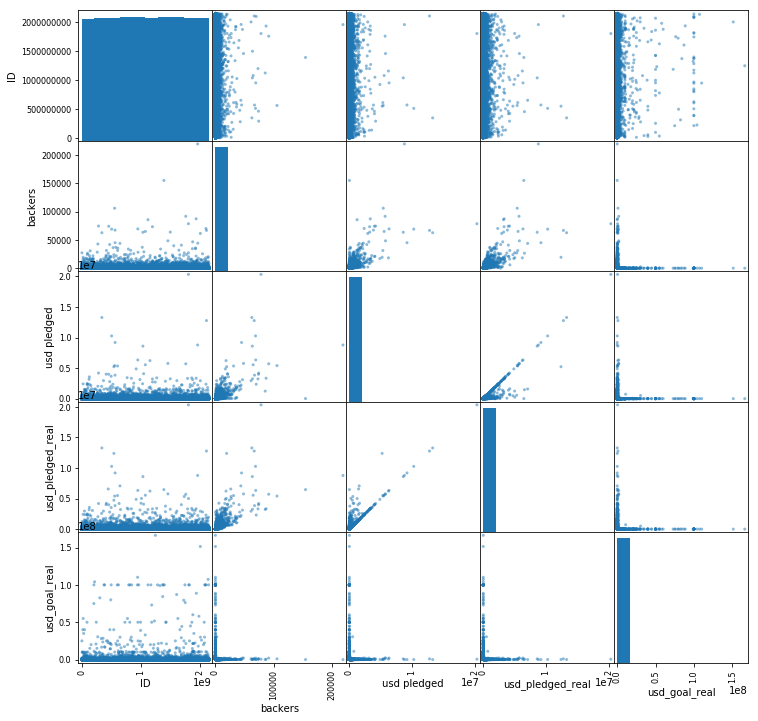

In [29]:
pd.plotting.scatter_matrix(df, figsize=(12,12))
plt.show()

# 自身の現状課題 と対応
##### 知識不足のため、下記の内容を調査、学習しながら課題値用
### １）欠損値
+ 欠損値をどのように対処するか（どのコラム名か？）　
  - 結果1）2016のデータは、欠損の列、データ数が少ないため、利用せず除外
  - 結果2) 欠損値は、対全体データ比1%より、dropna()関数で、削除する

### ２）時間データ処理
+ クラウドファウンディングの開始／終了時間が、上記の要約統計情報に表示されていない。
  - データ型がObject型の「文字列」であるために、「datetime型」に変更する必要がある
+ １）、２）では、表示形式も異なるため、データ修正も必要　
  - １）launched  = 日付＋時間
  - ２）deadline   = 日付 
+ 日数（期間：日付1 -日付2 )の計算方法の確認調査


### ３）各説明変数と目的変数の成功要因／関係性について
+ つまりクラウドファウンディングが成功する要因：
  - 期間（diff = deadline - launched ）の長さ
  - 集金金額の額（高額、少額）　 
  - 支援者（Backerの数）：多数から少額を積み上げる。小数でも「魅力があれば、高額寄付者が存在」
  - 
+ ★上記の関係を、グラフ化し関係性などの考察が必要
+  まず、目的変数（state)を、ダミー変数化すべきか、数値化するべきか調査後対応
  - １）pd.get_dummies()
  - ２）pd.factorise()
+ 上記の場合において、集める金額、日数などを「四分位数」などグラフなどで、中央値、外れ値の確認を


### ）分類と精度（混合行列化）
+ クラウドファウンディングが成功する要因の明確化
 

**---------------------------------------------------------------------------------------**

 ## 1)欠損値
+ name = 4個、また　usd_pleged=3797の欠損値が存在する。
+ 全データの合計個数=378661。　
  - 全体数の対し、欠損値の割合は１％のため削除

In [74]:
df.count()

ID                  378661
name                378657
category            378661
main_category       378661
launched            378661
deadline            378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

In [73]:
df.isnull().any()

ID                  False
name                 True
category            False
main_category       False
launched            False
deadline            False
state               False
backers             False
country             False
usd pledged          True
usd_pledged_real    False
usd_goal_real       False
dtype: bool

In [71]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
launched               0
deadline               0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

## 2）時間データの対応
### 暫定的な選択項目でのデータセット読み込み
★文字列の「開始・終了の日時」を、文字型から「datetime型」に変えて、読み込みを行う。

In [68]:
df= pd.read_csv("../DATA/kickst/ks-projects-201801.csv", parse_dates=[4,5])[['ID', 'name', 'category', 'main_category','launched', \
                            'deadline','state', 'backers','country','usd pledged','usd_pledged_real', 'usd_goal_real' ]]
display(df.head())

,ID,name,category,main_category,launched,deadline,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-08-11 12:12:28,2015-10-09,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-09-02 04:43:57,2017-11-01,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-01-12 00:20:50,2013-02-26,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-03-17 03:24:11,2012-04-16,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-07-04 08:35:03,2015-08-29,canceled,14,US,1283.0,1283.0,19500.00


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 12 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
launched            378661 non-null object
deadline            378661 non-null datetime64[ns]
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 34.7+ MB


### 日時データ処理
+ deadline（日付のみ）は、datetime64へ変更できた
+ launched （日付＋時間）は、Object型のまま　＝＞　追加調査必要

In [70]:
df['launched'] = pd.to_datetime(df['launched'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 12 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
launched            378661 non-null datetime64[ns]
deadline            378661 non-null datetime64[ns]
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 34.7+ MB


In [72]:
df['diff'] = df['deadline'] - df['launched']

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 13 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
launched            378661 non-null datetime64[ns]
deadline            378661 non-null datetime64[ns]
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
diff                378661 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(5), timedelta64[ns](1)
memory usage: 37.6+ MB


In [74]:
df.head()

,ID,name,category,main_category,launched,deadline,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,diff
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-08-11 12:12:28,2015-10-09,failed,0,GB,0.0,0.0,1533.95,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-09-02 04:43:57,2017-11-01,failed,15,US,100.0,2421.0,30000.00,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-01-12 00:20:50,2013-02-26,failed,3,US,220.0,220.0,45000.00,44 days 23:39:10
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-03-17 03:24:11,2012-04-16,failed,1,US,1.0,1.0,5000.00,29 days 20:35:49
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-07-04 08:35:03,2015-08-29,canceled,14,US,1283.0,1283.0,19500.00,55 days 15:24:57


# ３.データ（説明変数＆説明変数）の可視化と関係性

### 3.1 目的変数（State)の確認
+ Stateには下記の様に複数属性があり、これら内容で分類し、検討する必要あり。
  - successful, failed, canceled,  (etc. ?)
  - データ内容を読み出して確認する必要あり。

In [75]:
Status = df['state'].unique()
print(Status)
Status_count = df['state'].value_counts()
print(Status_count)
print()
Status_ratio = Status_count / df.shape[0] *100
print(Status_ratio)

['failed' 'canceled' 'successful' 'live' 'undefined' 'suspended']
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

failed        52.215306
successful    35.376234
canceled      10.241086
undefined      0.940683
live           0.739184
suspended      0.487507
Name: state, dtype: float64


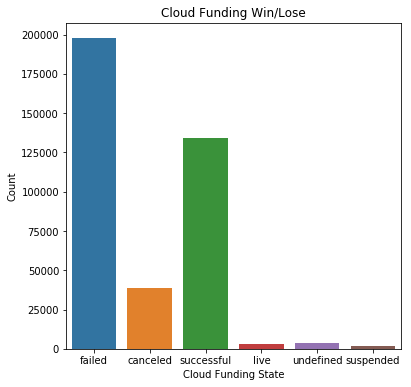

In [80]:
fig = plt.figure(figsize=(6, 6))

ax1 = fig.add_subplot
ax1 = sns.countplot('state', data=df)

ax1.set_title('Cloud Funding Win/Lose')
ax1.set_xlabel('Cloud Funding State')
ax1.set_ylabel('Count')


plt.show()

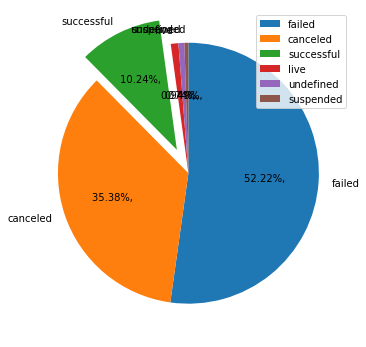

In [81]:
fig = plt.figure(figsize=(6, 6))

ex = [0, 0, 0.2, 0, 0, 0]
plt.pie(Status_ratio, labels= Status, explode= ex, \
        counterclock= False, startangle=90, autopct='%1.2f%%, '  )
plt.legend(loc='upper right')

plt.show()

### クラウドファウンディングの最終状態について
* 簡易考察
+ １）live,undefined,suspendは、データ個数より無視する
+ ２）Cancelについては、時間があれば考察して、取り扱いを明確にする
+ ３）初回は、Failed・Successfulについて、2値分類を考える

AttributeError: 'tuple' object has no attribute 'legend'

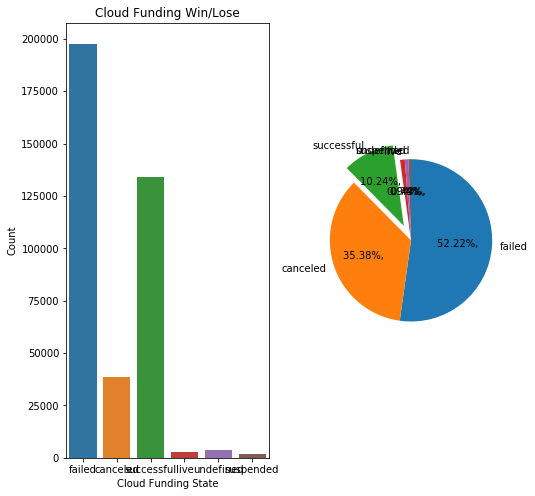

In [79]:
fig = plt.figure(figsize=(6, 6))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.countplot('state', data=df)

ax1.set_title('Cloud Funding Win/Lose')
ax1.set_xlabel('Cloud Funding State')
ax1.set_ylabel('Count')

ex = [0, 0, 0.2, 0, 0, 0]
ax2 =fig.add_subplot(1,2,2)
ax2= plt.pie(Status_ratio, labels= Status, explode= ex, \
        counterclock= False, startangle=90, autopct='%1.2f%%, '  )
ax2.legend(loc='upper right')

plt.show()

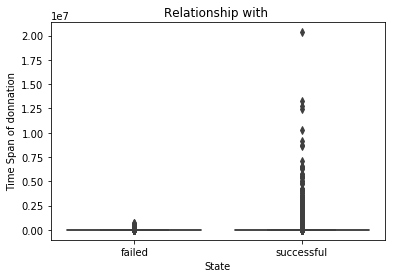

In [98]:
df_min_state =df[ (df['state'] == 'failed') |  (df['state'] == 'successful') ]
#df_min_state =df[ df['state'] == 'failed']

#display(df_min_state.head())

box, ax = plt.subplots()
ax = sns.boxplot(x='state', y='usd_pledged_real', data=df_min_state)

ax.set_title('Relationship with ')
ax.set_xlabel('State')
ax.set_ylabel('Time Span of donnation')

plt.show()

<Figure size 576x576 with 0 Axes>

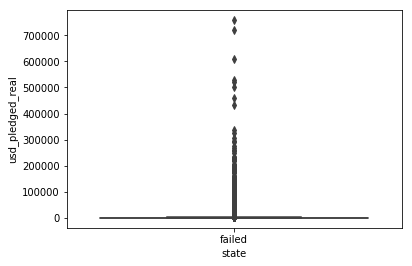

In [115]:
df_min_state_FF = df[df['state'] == 'failed']
#df_min_state =df[ df['state'] == 'failed']

#display(df_min_state.head())

plt.figure(figsize=(8,8))

box, ax = plt.subplots()
ax = sns.boxplot(x='state', y='usd_pledged_real', data=df_min_state_FF)

ax1.set_title('Relationship with ')
ax1.set_xlabel('State')
ax1.set_ylabel('Money (USD)')
plt.show()


<Figure size 720x720 with 0 Axes>

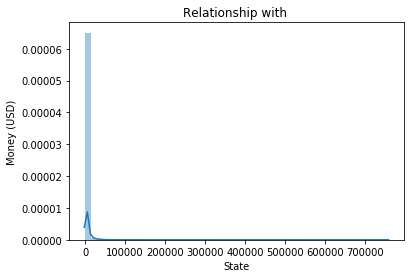

In [117]:
df_min_state_FF = df[df['state'] == 'failed']
#df_min_state =df[ df['state'] == 'failed']

#display(df_min_state.head())

plt.figure(figsize=(10,10))

hist, ax1 = plt.subplots()
ax1 = sns.distplot( df_min_state_FF['usd_pledged_real'])

ax1.set_title('Relationship with ')
ax1.set_xlabel('State')
ax1.set_ylabel('Money (USD)')
plt.show()


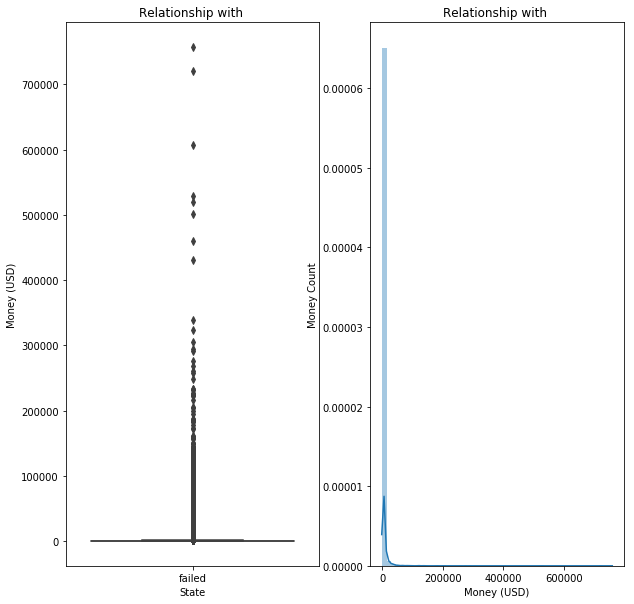

In [111]:
df_min_state_FF = df[df['state'] == 'failed']
#df_min_state =df[ df['state'] == 'failed']

#display(df_min_state.head())

plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.boxplot(x='state', y='usd_pledged_real', data=df_min_state_FF)

ax1.set_title('Relationship with ')
ax1.set_xlabel('State')
ax1.set_ylabel('Money (USD)')

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.distplot(df_min_state_FF['usd_pledged_real'])

ax2.set_title('Relationship with ')
ax2.set_xlabel('Money (USD)')
ax2.set_ylabel('Money Count')


plt.show()

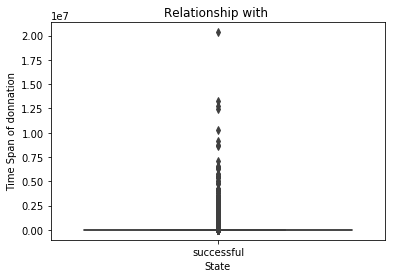

In [102]:
df_min_state_SS = df[df['state'] == 'successful']
#df_min_state =df[ df['state'] == 'failed']

#display(df_min_state.head())

box, ax = plt.subplots()
ax = sns.boxplot(x='state', y='usd_pledged_real', data=df_min_state_SS)

ax.set_title('Relationship with ')
ax.set_xlabel('State')
ax.set_ylabel('Money (USD)')

plt.show()

In [ ]:
# カテゴリ変数の処理
df_fuel_dummies=pd.get_dummies(df_fuel_drop,columns=["gas_type"],drop_first=True)
df_fuel_dummies.head()

In [59]:
# State をダミー変数化して、関係性を調べる
df_dummy = pd.get_dummies(df, columns=["state"], drop_first=True)
df_dummy.head()

,ID,name,category,main_category,launched,deadline,backers,country,usd pledged,usd_pledged_real,usd_goal_real,diff,state_failed,state_live,state_successful,state_suspended,state_undefined
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-08-11 12:12:28,2015-10-09,0,GB,0.0,0.0,1533.95,58 days 11:47:32,1,0,0,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-09-02 04:43:57,2017-11-01,15,US,100.0,2421.0,30000.00,59 days 19:16:03,1,0,0,0,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-01-12 00:20:50,2013-02-26,3,US,220.0,220.0,45000.00,44 days 23:39:10,1,0,0,0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-03-17 03:24:11,2012-04-16,1,US,1.0,1.0,5000.00,29 days 20:35:49,1,0,0,0,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-07-04 08:35:03,2015-08-29,14,US,1283.0,1283.0,19500.00,55 days 15:24:57,0,0,0,0,0


TypeError: invalid type promotion

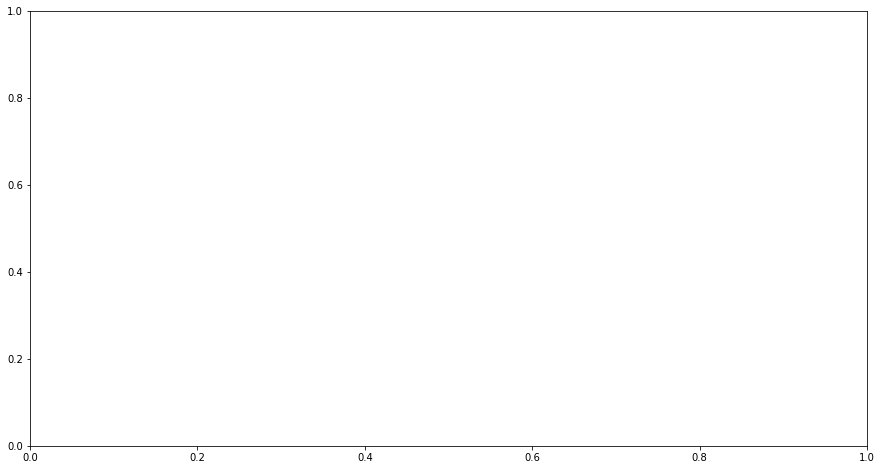

In [56]:
# State をダミー変数化して、関係性を調べる
df_dummy = pd.get_dummies(df, columns=["state"], drop_first=True)

plt.figure(figsize=(15, 8))


plt.show()